## Problem Statement

India's leading institute for study abroad test preparation and admission counselling has helped thousands of students for making it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

__Expectation from this analysis:__
Help institute in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Jamboree_Admission.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Let's drop irrelevant column and rename some columns for better use

In [4]:
data.rename(columns={'LOR ':'LOR'}, inplace = True)
data.drop(columns='Serial No.', inplace=True)

__Checking the structure & characteristics of the dataset__

In [5]:
data.shape

(500, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in given data so no need for missing value treatment

In [8]:
data.duplicated().unique()

array([False])

There are no duplicate rows

In [9]:
## statistical summary
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Columns with cateogrical values

In [10]:
for i in data.columns:
    if data[i].nunique() < 10:
        print(i, ':', np.sort(data[i].unique()))

University Rating : [1 2 3 4 5]
SOP : [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
LOR : [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Research : [0 1]


In [11]:
df = data.copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [13]:
df['University Rating'] = df['University Rating'].astype('category')
df['SOP'] = df['SOP'].astype('category')
df['LOR'] = df['LOR'].astype('category')
df['Research'] = df['Research'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


## Exploratory Data Analysis

### Univariate Analysis

__Checking the distribution of continuous variables of graduate applicants__

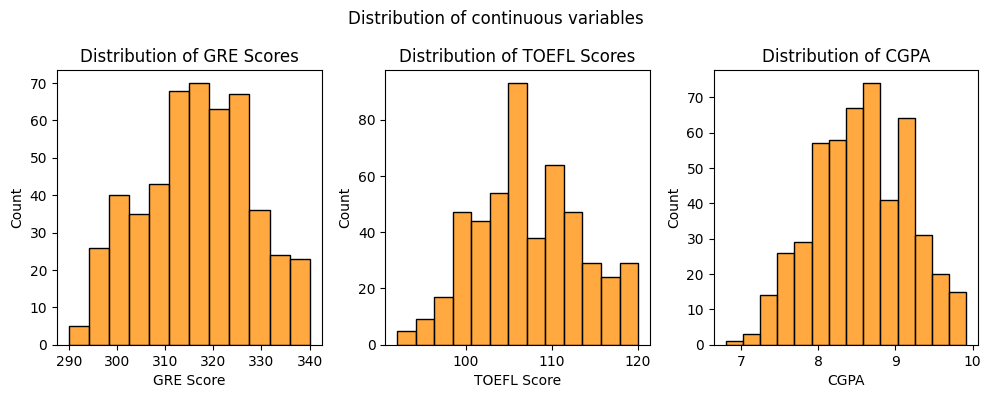

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Distribution of continuous variables')
axes[0].set_title('Distribution of GRE Scores')
axes[1].set_title('Distribution of TOEFL Scores')
axes[2].set_title('Distribution of CGPA')
sns.histplot(df['GRE Score'],color='darkorange', ax=axes[0])
sns.histplot(df['TOEFL Score'],color='darkorange', ax=axes[1])
sns.histplot(df['CGPA'],color='darkorange', ax=axes[2])
plt.tight_layout(pad=1) 
plt.show()

__Checking the distribution of categorical variables of graduate applicants__

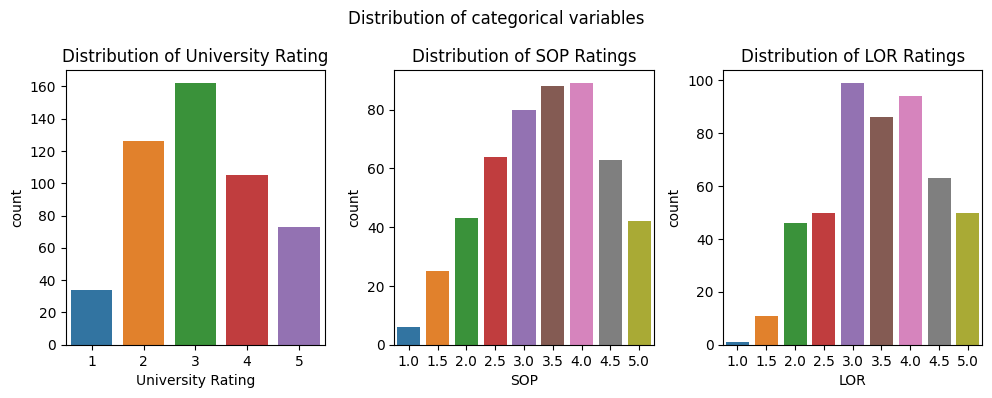

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Distribution of categorical variables')
axes[0].set_title('Distribution of University Rating')
axes[1].set_title('Distribution of SOP Ratings')
axes[2].set_title('Distribution of LOR Ratings')
sns.countplot(df, x='University Rating', ax=axes[0])
sns.countplot(df, x='SOP', ax=axes[1])
sns.countplot(df, x='LOR', ax=axes[2])
plt.tight_layout(pad=1) 
plt.show()

It is clear from the distributions, students with varied merit apply for the university.

### Outlier Check

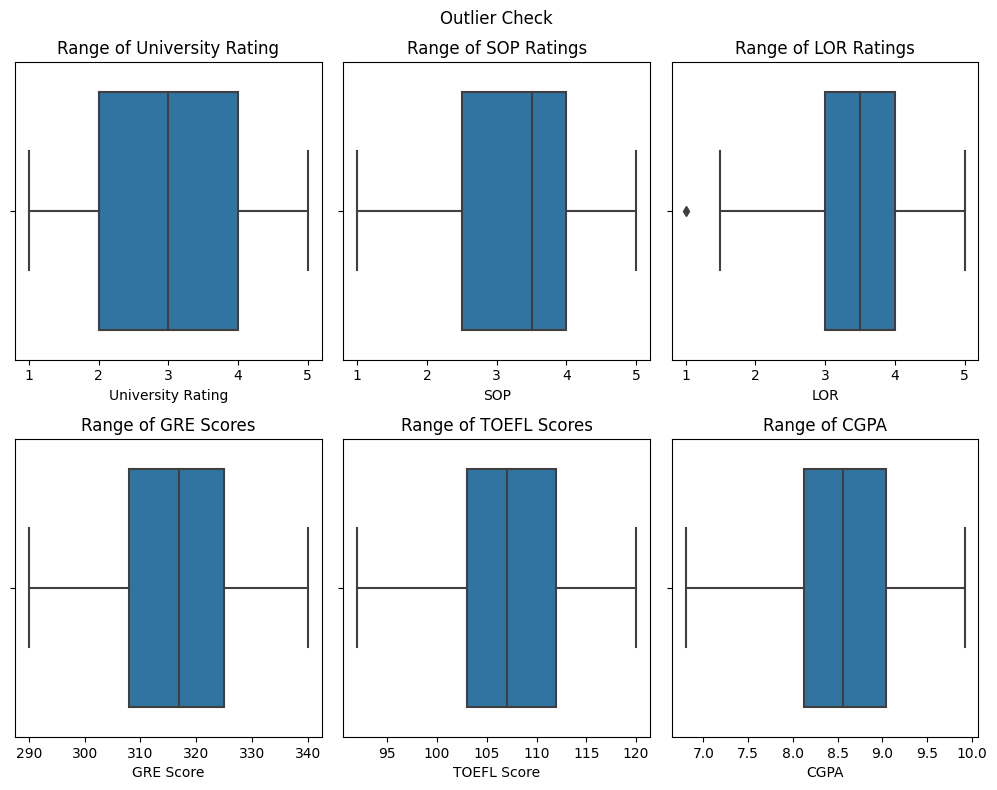

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
fig.suptitle('Outlier Check')
axes[0][0].set_title('Range of University Rating')
axes[0][1].set_title('Range of SOP Ratings')
axes[0][2].set_title('Range of LOR Ratings')
axes[1][0].set_title('Range of GRE Scores')
axes[1][1].set_title('Range of TOEFL Scores')
axes[1][2].set_title('Range of CGPA')
sns.boxplot(data, x='University Rating', ax=axes[0][0])
sns.boxplot(data, x='SOP', ax=axes[0][1])
sns.boxplot(data, x='LOR', ax=axes[0][2])
sns.boxplot(data, x='GRE Score', ax=axes[1][0])
sns.boxplot(data, x='TOEFL Score', ax=axes[1][1])
sns.boxplot(data, x='CGPA', ax=axes[1][2])
plt.tight_layout(pad=1) 
plt.show()

It is clear from above plots that there is no outliers in most of the important variables except LOR rating. As we have less data points in given dataset let's not remove this outlier point 

### Bivariate Analysis

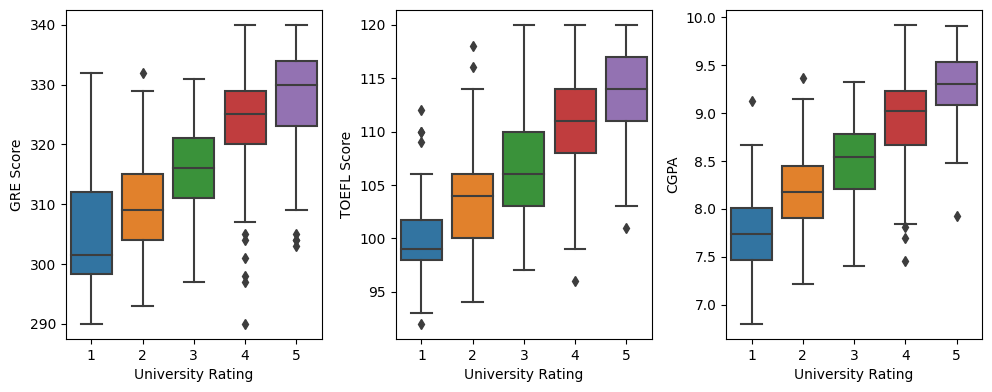

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.boxplot(df, x='University Rating', y='GRE Score')
plt.subplot(1,3,2)
sns.boxplot(df, x='University Rating', y='TOEFL Score')
plt.subplot(1,3,3)
sns.boxplot(df, x='University Rating', y='CGPA')
plt.tight_layout(pad=1)
plt.show()

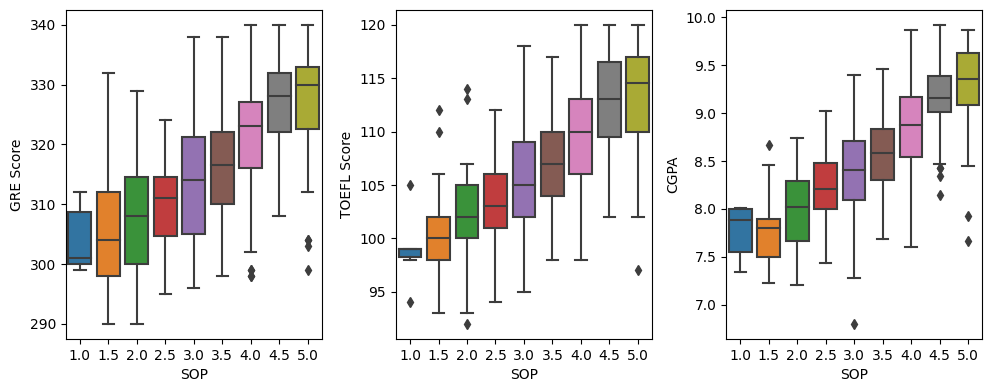

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.boxplot(df, x='SOP', y='GRE Score')
plt.subplot(1,3,2)
sns.boxplot(df, x='SOP', y='TOEFL Score')
plt.subplot(1,3,3)
sns.boxplot(df, x='SOP', y='CGPA')
plt.tight_layout(pad=1)
plt.show()

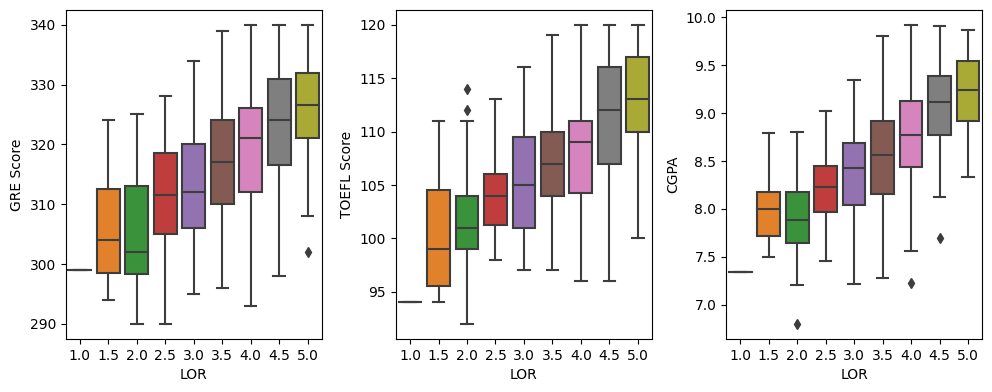

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.boxplot(df, x='LOR', y='GRE Score')
plt.subplot(1,3,2)
sns.boxplot(df, x='LOR', y='TOEFL Score')
plt.subplot(1,3,3)
sns.boxplot(df, x='LOR', y='CGPA')
plt.tight_layout(pad=1)
plt.show()

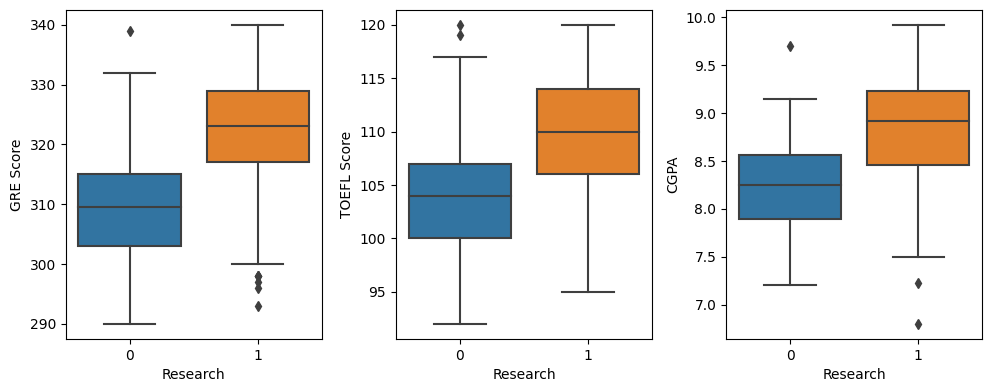

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.boxplot(df, x='Research', y='GRE Score')
plt.subplot(1,3,2)
sns.boxplot(df, x='Research', y='TOEFL Score')
plt.subplot(1,3,3)
sns.boxplot(df, x='Research', y='CGPA')
plt.tight_layout(pad=1)
plt.show()

Students with research experience have higher GRE, TOEFL, CGPA scores compared to students with no research experience

### Understanding the relationship between different factors responsible for graduate admissions

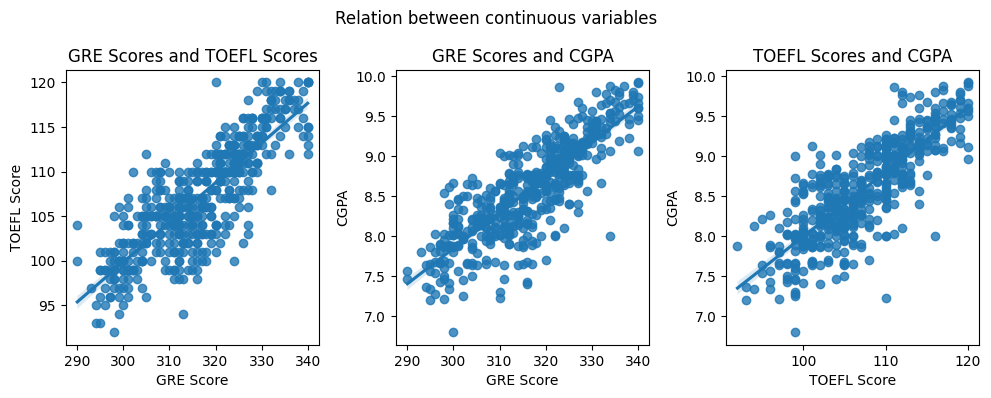

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Relation between continuous variables')
axes[0].set_title('GRE Scores and TOEFL Scores')
axes[1].set_title('GRE Scores and CGPA')
axes[2].set_title('TOEFL Scores and CGPA')
sns.regplot(data, x='GRE Score', y='TOEFL Score', ax=axes[0])
sns.regplot(data, x='GRE Score', y='CGPA', ax=axes[1])
sns.regplot(data, x='TOEFL Score', y='CGPA', ax=axes[2])
plt.tight_layout(pad=1) 
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

Although there are exceptions, people with higher CGPA usually have higher GRE scores and TOEFL scores maybe because they are smart or hard working


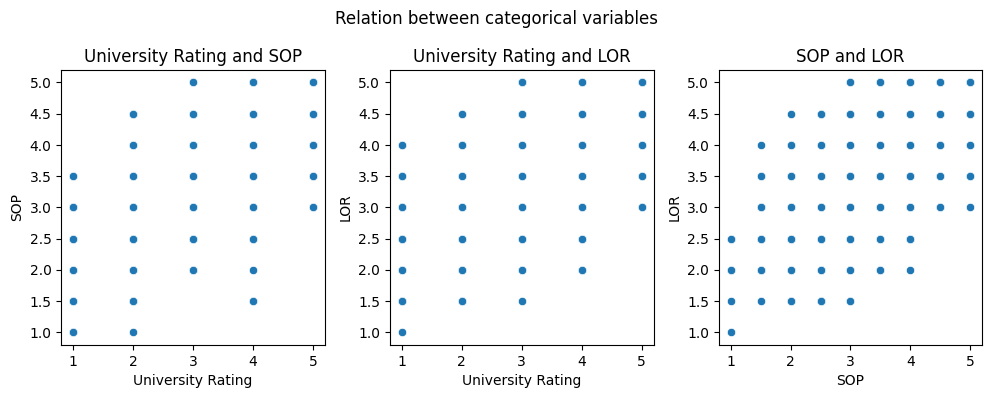

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Relation between categorical variables')
axes[0].set_title('University Rating and SOP')
axes[1].set_title('University Rating and LOR')
axes[2].set_title('SOP and LOR')
sns.scatterplot(data, x='University Rating', y='SOP', ax=axes[0])
sns.scatterplot(data, x='University Rating', y='LOR', ax=axes[1])
sns.scatterplot(data, x='SOP', y='LOR', ax=axes[2])
plt.tight_layout(pad=1) 
plt.show()

Univesity Rating, SOP & LOR are not related from above plot. For each University Rating there are different values of SOP and LOR

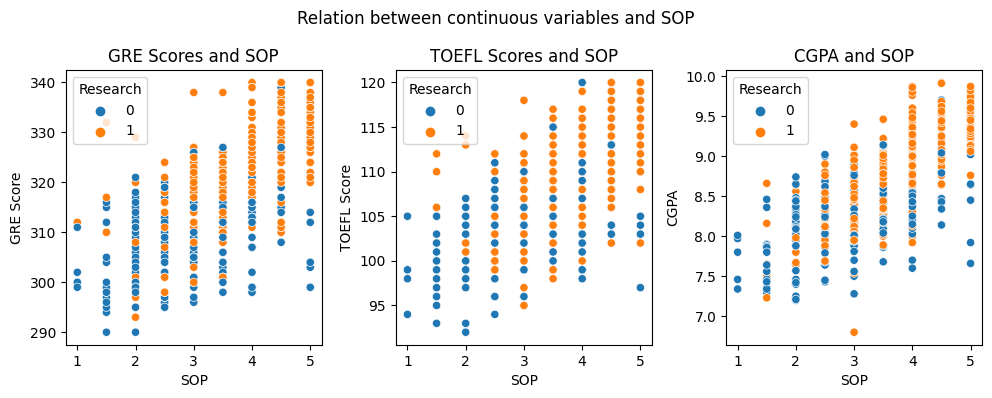

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Relation between continuous variables and SOP')
axes[0].set_title('GRE Scores and SOP')
axes[1].set_title('TOEFL Scores and SOP')
axes[2].set_title('CGPA and SOP')
sns.scatterplot(df, y='GRE Score', x='SOP', hue='Research', ax=axes[0])
sns.scatterplot(df, y='TOEFL Score', x='SOP', hue='Research', ax=axes[1])
sns.scatterplot(df, y='CGPA', x='SOP', hue='Research', ax=axes[2])
plt.tight_layout(pad=1) 
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs

Similary, GRE Score and CGPA is only slightly related

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

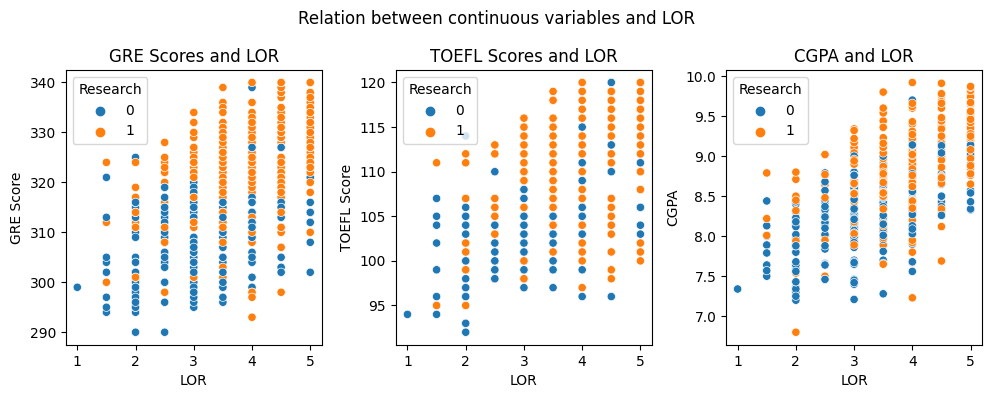

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Relation between continuous variables and LOR')
axes[0].set_title('GRE Scores and LOR')
axes[1].set_title('TOEFL Scores and LOR')
axes[2].set_title('CGPA and LOR')
sns.scatterplot(df, y='GRE Score', x='LOR', hue='Research', ax=axes[0])
sns.scatterplot(df, y='TOEFL Score', x='LOR', hue='Research', ax=axes[1])
sns.scatterplot(df, y='CGPA', x='LOR', hue='Research', ax=axes[2])
plt.tight_layout(pad=1) 
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

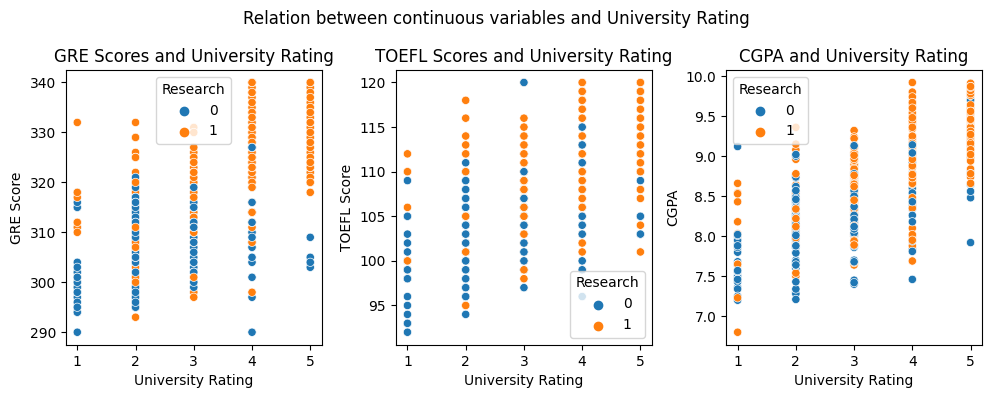

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Relation between continuous variables and University Rating')
axes[0].set_title('GRE Scores and University Rating')
axes[1].set_title('TOEFL Scores and University Rating')
axes[2].set_title('CGPA and University Rating')
sns.scatterplot(df, y='GRE Score', x='University Rating', hue='Research', ax=axes[0])
sns.scatterplot(df, y='TOEFL Score', x='University Rating', hue='Research', ax=axes[1])
sns.scatterplot(df, y='CGPA', x='University Rating', hue='Research', ax=axes[2])
plt.tight_layout(pad=1) 
plt.show()

University Rating is not that related with CGPA. Students with research experience are found in all kinds of University Ratings.

GRE scores and University Ratings are also not that related. People with different University Ratings have all kinds of GRE scores

### Correlation among independent variables

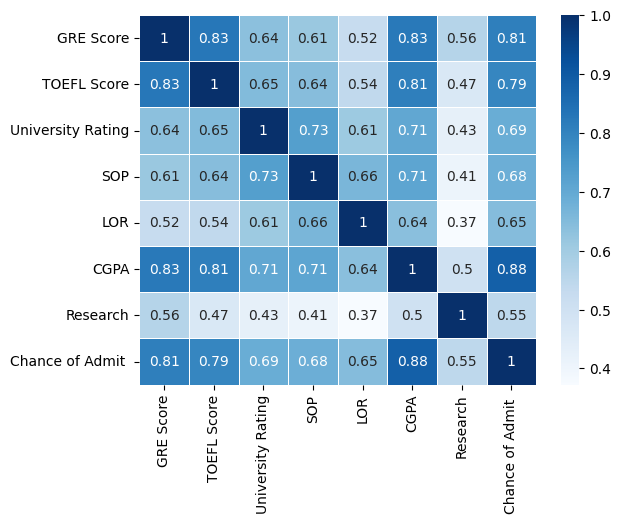

In [27]:
corr = data.corr()
sns.heatmap(corr, linewidths=.5, annot=True, cmap='Blues')
plt.show()

Chance of admit particularly governed by three major factors GRE score, TOEFL score and CGPA

## Feature engineering and Data preparation for model building

In [94]:
from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)

In [96]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
369,301,98,1,2.0,3.0,8.03,1
254,321,114,4,4.0,5.0,9.12,0
196,306,105,2,3.0,2.5,8.26,0
354,297,98,2,2.5,3.0,7.67,0
155,312,109,3,3.0,3.0,8.69,0
...,...,...,...,...,...,...,...
274,315,100,1,2.0,2.5,7.95,0
145,320,113,2,2.0,2.5,8.64,1
452,328,116,4,5.0,3.5,9.60,1
391,318,106,3,2.0,3.0,8.65,0


In [97]:
y_train

369    0.67
254    0.85
196    0.73
354    0.59
155    0.77
       ... 
274    0.58
145    0.81
452    0.93
391    0.71
54     0.70
Name: Chance of Admit , Length: 400, dtype: float64

In [98]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [99]:
X_train_std

array([[-1.38499094, -1.51666964, -1.86854561, ..., -0.55515459,
        -0.89313945,  0.8553372 ],
       [ 0.38921683,  1.12316873,  0.75397454, ...,  1.64347746,
         0.89043954, -1.16912955],
       [-0.941439  , -0.36174035, -0.99437222, ..., -1.10481261,
        -0.51678792, -1.16912955],
       ...,
       [ 1.01018955,  1.45314853,  0.75397454, ..., -0.00549658,
         1.67586881,  0.8553372 ],
       [ 0.12308566, -0.19675045, -0.12019884, ..., -0.55515459,
         0.12137337, -1.16912955],
       [ 0.47792722,  0.46320914, -0.12019884, ..., -0.00549658,
        -0.94222878, -1.16912955]])

In [100]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [101]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.384991,-1.516670,-1.868546,-1.422694,-0.555155,-0.893139,0.855337
1,0.389217,1.123169,0.753975,0.611542,1.643477,0.890440,-1.169130
2,-0.941439,-0.361740,-0.994372,-0.405576,-1.104813,-0.516788,-1.169130
3,-1.739832,-1.516670,-0.994372,-0.914135,-0.555155,-1.482211,-1.169130
4,-0.409177,0.298219,-0.120199,-0.405576,-0.555155,0.186826,-1.169130
...,...,...,...,...,...,...,...
395,-0.143046,-1.186690,-1.868546,-1.422694,-1.104813,-1.024044,-1.169130
396,0.300506,0.958179,-0.994372,-1.422694,-1.104813,0.105010,0.855337
397,1.010190,1.453149,0.753975,1.628660,-0.005497,1.675869,0.855337
398,0.123086,-0.196750,-0.120199,-1.422694,-0.555155,0.121373,-1.169130


## Model building

In [102]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

models = [['Linear Regression :', LinearRegression()],         
          ['Lasso Regression :', Lasso(alpha=0.1)],
          ['Ridge Regression :', Ridge(alpha=1.0)]]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results without removing features with multicollinearity ...
Linear Regression : 0.05550255922280544
Lasso Regression : 0.11545782035536731
Ridge Regression : 0.05548058361213145


### Linear Regression using Statsmodel library

In [103]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     252.9
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          4.31e-141
Time:                        22:17:58   Log-Likelihood:                 554.19
No. Observations:                 400   AIC:                            -1092.
Df Residuals:                     392   BIC:                            -1060.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7221      0.00

In [104]:
X_train_new=X_train.drop(columns='SOP')

In [105]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     295.8
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          2.41e-142
Time:                        22:18:00   Log-Likelihood:                 554.19
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     393   BIC:                            -1066.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7221      0.00

### Testing the assumptions of the linear regression model

__Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)__

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
    dataset=dataset.drop(columns=col,axis=1)
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [107]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.303287
2,TOEFL Score,3.658755
3,University Rating,2.240920
4,LOR,1.812521
5,CGPA,4.645160
6,Research,1.450740


Here, VIF looks fine and hence, we can go ahead with the predictions

In [108]:
X_test_std= std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_train_columns)
X_test = sm.add_constant(X_test)
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [109]:
X_test_new=X_test.drop(columns=X_test_del)

In [110]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred)))

Mean Absolute Error  0.040405728787060724
Root Mean Square Error  0.055478123460713395


__The mean of residuals is nearly zero__

In [111]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.003775973276626726


__Linearity of variables & Test for Homoscedasticity__

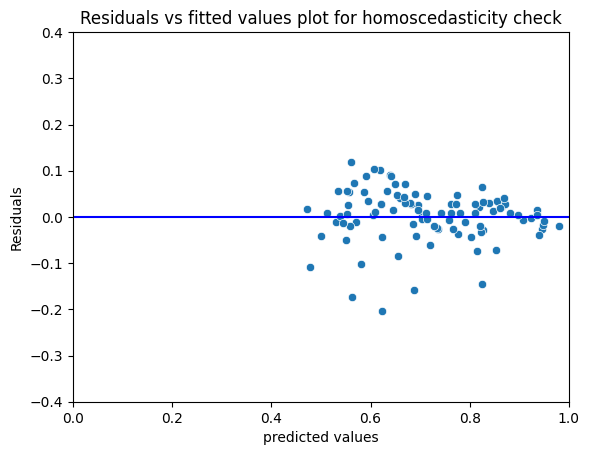

In [112]:
fig = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
fig = sns.lineplot(x=[0,1],y=[0,0],color='blue')
fig = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [113]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.9933692725658867), ('p-value', 0.5085485262608683)]

Here null hypothesis is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

__Normality of residuals  (QQ plot)__

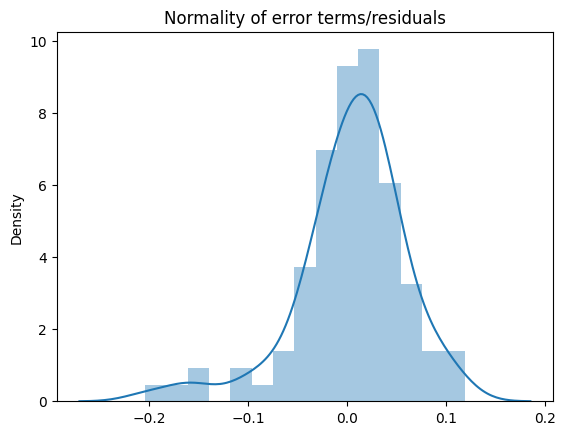

In [114]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

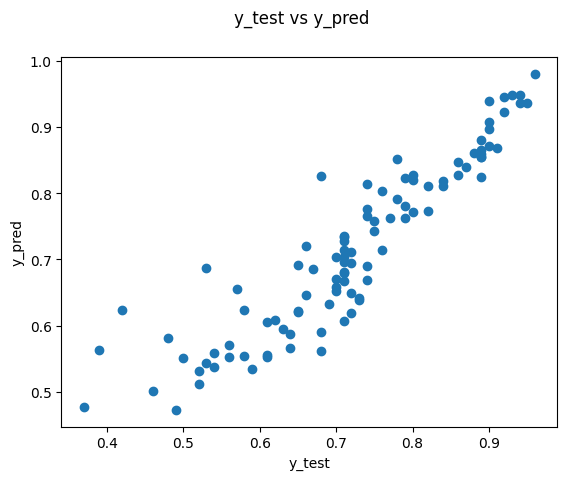

In [115]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred')              
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

### Multivariate Linear Regression

In [134]:
X = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)

In [136]:
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)
X_test_std= std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_train_columns)

In [137]:
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [138]:
y_train.shape, y_test.shape

((400,), (100,))

In [139]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [140]:
LR.fit(X_train,y_train)

LinearRegression()

In [141]:
y_pred =  LR.predict(X_test)
y_pred

array([0.55348669, 0.69042724, 0.60496693, 0.77759827, 0.88548772,
       0.70214292, 0.78982058, 0.67480747, 0.6542999 , 0.80989524,
       0.79636457, 0.68106605, 0.70420461, 0.80869779, 0.4947124 ,
       0.88233572, 0.78554327, 0.75993789, 0.63154132, 0.61085696,
       0.51480168, 0.77514767, 0.5625139 , 0.8470097 , 0.76971535,
       0.86885065, 0.513911  , 0.58536839, 0.88335212, 0.90959563,
       0.68391228, 0.50888406, 0.64756124, 0.72650933, 0.74064956,
       0.61898945, 0.74468099, 0.46973694, 0.73531287, 0.80404094,
       0.78634555, 0.94816801, 0.72778741, 0.55822167, 0.79856418,
       0.67366031, 0.66975117, 0.5686486 , 0.91074893, 0.63607196,
       0.42943343, 0.71847636, 0.62060258, 0.61516069, 0.64388112,
       0.59185423, 0.56695663, 0.71275756, 0.90548599, 0.72345228,
       0.66927813, 0.95857057, 0.77958642, 0.83466494, 0.45463241,
       0.5831167 , 0.6851208 , 0.74639231, 0.75120177, 0.73787027,
       0.79097127, 0.65387641, 0.64469606, 0.56473573, 0.93013

In [142]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [143]:
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))

mean_absolute_error:  0.04449521307848858


In [144]:
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))

mean_squared_error:  0.0034077738100436305


In [145]:
print('root_mean_squared_error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

root_mean_squared_error:  0.058376140760105326


In [146]:
print('R squared error: ', r2_score(y_test, y_pred))

R squared error:  0.8079257415728798


In [147]:
print('Adjusted R squared error: ', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R squared error:  0.7933113958229902


As the value of r2_score is above 0.8 means model is performing better

In [148]:
w0 = LR.intercept_
wi = LR.coef_

In [149]:
print('Intercept: ', w0)

Intercept:  0.7246250000000001


In [159]:
for i in range(len(wi)):
    print(X_train.columns[i],':',round(wi[i],4))

GRE Score : 0.0188
TOEFL Score : 0.0183
University Rating : 0.0081
SOP : 0.0005
LOR : 0.0174
CGPA : 0.0735
Research : 0.0097


__Let's drop SOP & University Rating columns and check model performance__

In [169]:
X_train_new=X_train.drop(columns=['SOP', 'University Rating'])

In [170]:
X_test_new=X_test.drop(columns=['SOP', 'University Rating'])

In [171]:
LR.fit(X_train_new,y_train)

LinearRegression()

In [172]:
y_pred =  LR.predict(X_test_new)
y_pred

array([0.56036075, 0.69712079, 0.59850161, 0.78068458, 0.87918045,
       0.68727744, 0.78664288, 0.67393106, 0.65287316, 0.81367119,
       0.80777106, 0.67802288, 0.71103341, 0.80791425, 0.50085491,
       0.87533646, 0.77443588, 0.76213005, 0.63731546, 0.60495312,
       0.50647298, 0.77013451, 0.55455288, 0.838382  , 0.78180663,
       0.86785274, 0.51224451, 0.59419479, 0.87700258, 0.9054085 ,
       0.68278082, 0.50083446, 0.64620154, 0.73647409, 0.7391325 ,
       0.62129632, 0.74564392, 0.47161055, 0.73811305, 0.80078635,
       0.78232508, 0.94530471, 0.7280667 , 0.55800111, 0.79268188,
       0.67284479, 0.66782813, 0.56878416, 0.90443663, 0.64002421,
       0.42886064, 0.71041709, 0.6084218 , 0.61849986, 0.63483333,
       0.58717912, 0.56969352, 0.71445965, 0.90588506, 0.72388332,
       0.67676772, 0.95437245, 0.76925472, 0.82485597, 0.44972651,
       0.58374256, 0.66958651, 0.74105309, 0.7509894 , 0.73838608,
       0.79434647, 0.64972438, 0.6426463 , 0.5718136 , 0.92570

In [173]:
print('R squared error: ', r2_score(y_test, y_pred))

R squared error:  0.8073158663369874


In [174]:
print('Adjusted R squared error: ', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1))

Adjusted R squared error:  0.7970667102910824


In [175]:
w0_new = LR.intercept_
wi_new = LR.coef_

In [176]:
print('New Intercept: ', w0_new)

New Intercept:  0.7246250000000001


In [177]:
for i in range(len(wi_new)):
    print(X_train_new.columns[i],':',round(wi_new[i],4))

GRE Score : 0.0192
TOEFL Score : 0.02
LOR : 0.0197
CGPA : 0.0762
Research : 0.0101


__In terms of feature importance for predicting chance of admission CGPA > TOEFL Score > LOR > GRE Score > Research__